# 8. В каких месяцах продажи были наибольшими и наименьшими?

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Загрузка данных
df = pd.read_csv('data/df.csv')

df.date = pd.to_datetime(df.date)
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,month,year
0,2013-01-01,1,Автомобильные товары,0.0,0,Quito,Pichincha,D,13,1,2013
1,2013-01-01,1,Уход за детьми,0.0,0,Quito,Pichincha,D,13,1,2013
2,2013-01-01,1,Косметика,0.0,0,Quito,Pichincha,D,13,1,2013
3,2013-01-01,1,Напитки,0.0,0,Quito,Pichincha,D,13,1,2013
4,2013-01-01,1,Книги,0.0,0,Quito,Pichincha,D,13,1,2013


Сформируем датафрейм с суммарными продажами за каждый месяц.

In [3]:
sales_by_month = pd.DataFrame(df.set_index('date').sales.resample('M').sum())

sales_by_month = sales_by_month.sort_values(by='sales', ascending=False) # сортировка по убыванию продаж
sales_by_month = sales_by_month.reset_index()
sales_by_month['month'] = sales_by_month['date'].dt.month # колонка с месяцем
sales_by_month['year'] = sales_by_month['date'].dt.year # колонка с годом

months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май',
            6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}

sales_by_month['month'] = sales_by_month['month'].apply(lambda x: months[x])

Месяцы с самыми высокими продажами.

In [4]:
sales_by_month[['month', 'year']].head(10)

,month,year
0,Декабрь,2016
1,Декабрь,2015
2,Июль,2017
3,Май,2017
4,Март,2017
5,Январь,2017
6,Апрель,2016
7,Апрель,2017
8,Июнь,2017
9,Май,2016


Месяцы с самыми низкими продажами.

In [5]:
sales_by_month[['month', 'year']].tail(10)

,month,year
46,Сентябрь,2013
47,Октябрь,2013
48,Август,2013
49,Июнь,2013
50,Май,2013
51,Март,2013
52,Июль,2013
53,Апрель,2013
54,Январь,2013
55,Февраль,2013


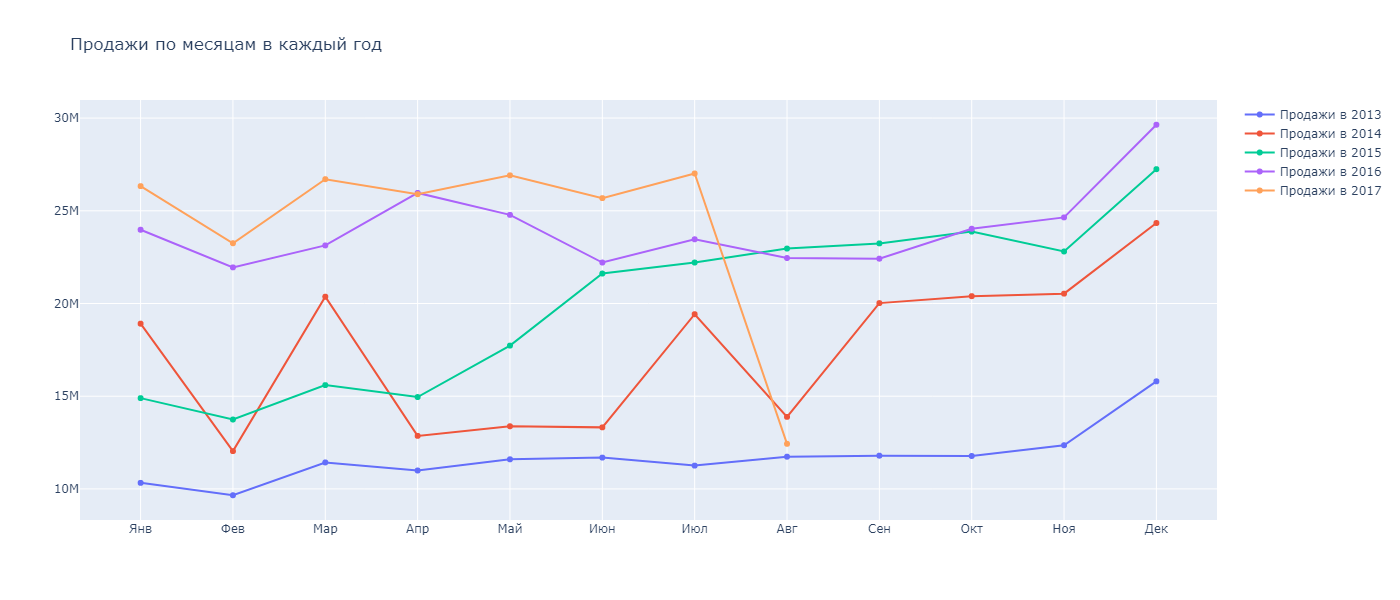

In [6]:
monthly_sales = df.groupby(['month','year'])['sales'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales[monthly_sales['year']==2013]['month'],
                    y=monthly_sales[monthly_sales['year']==2013]['sales'],
                    mode='lines+markers',
                    name='Продажи в 2013'))

fig.add_trace(go.Scatter(x=monthly_sales[monthly_sales['year']==2014]['month'],
                    y=monthly_sales[monthly_sales['year']==2014]['sales'],
                    mode='lines+markers',
                    name='Продажи в 2014'))

fig.add_trace(go.Scatter(x=monthly_sales[monthly_sales['year']==2015]['month'],
                    y=monthly_sales[monthly_sales['year']==2015]['sales'],
                    mode='lines+markers',
                    name='Продажи в 2015'))

fig.add_trace(go.Scatter(x=monthly_sales[monthly_sales['year']==2016]['month'],
                    y=monthly_sales[monthly_sales['year']==2016]['sales'],
                    mode='lines+markers',
                    name='Продажи в 2016'))
                    
fig.add_trace(go.Scatter(x=monthly_sales[monthly_sales['year']==2017]['month'],
                    y=monthly_sales[monthly_sales['year']==2017]['sales'],
                    mode='lines+markers',
                    name='Продажи в 2017'))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
    ),
    height=600,
    width=1400,
    title_text='Продажи по месяцам в каждый год')

fig.show()

display(Image(filename='img/montly_sales.png', width=1200))

Рекорд по продажам был установлен в декабре 2016 года. При этом видно, что декабрь - это самый доходный месяц в году (кроме 2017 года, так как данные о продажах в этом году были собраны только до августа).

По графику продаж можно заметить, что с каждым годом объем продаж увеличивается.

В 2014 году есть два месяца с аномально высокими продажами.

В июне 2015 года произошел сильный рост продаж, затем рост продолжился, но уже более медленными темпами.